In [1]:
%config InlineBackend.figure_format='retina'

# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = mpl.colormaps['viridis_r']


In [2]:
df = pd.read_csv("equilibrium_atmosphere_MC.csv",header=0, delimiter=r'\s+')

# Parse data...
result = {}
#    Results
result["H2O_bar"]           = df['H2O'].values
result["CO2_bar"]           = df['CO2'].values
result["N2_bar"]            = df['N2'].values
result["H2_bar"]            = df['H2'].values
result["CO_bar"]            = df['CO'].values
result["CH4_bar"]           = df['CH4'].values
result["tot_bar"]           = df['tot'].values
for e in ['C','N','H']:
    result[e+"_fracatm"]    = df["%s_atm_kg/%s_tot_kg"%(e,e)].values * 100.0
#    Parameters
result["H_ppm"]             = df['Hydrogen_ppm'].values
result["N_ppm"]             = df['Nitrogen_ppm'].values
result["CH_ratio"]          = df['CH_ratio'].values
result["Mantle_kg"]         = df['mantle_mass'].values
result["fO2-IW"]            = df['fO2_shift'].values
result["Tsurf"]             = df['temperature'].values

num_rows        = len(df['Hydrogen_ppm'].values)
print("Number of rows:",num_rows)


Number of rows: 2300


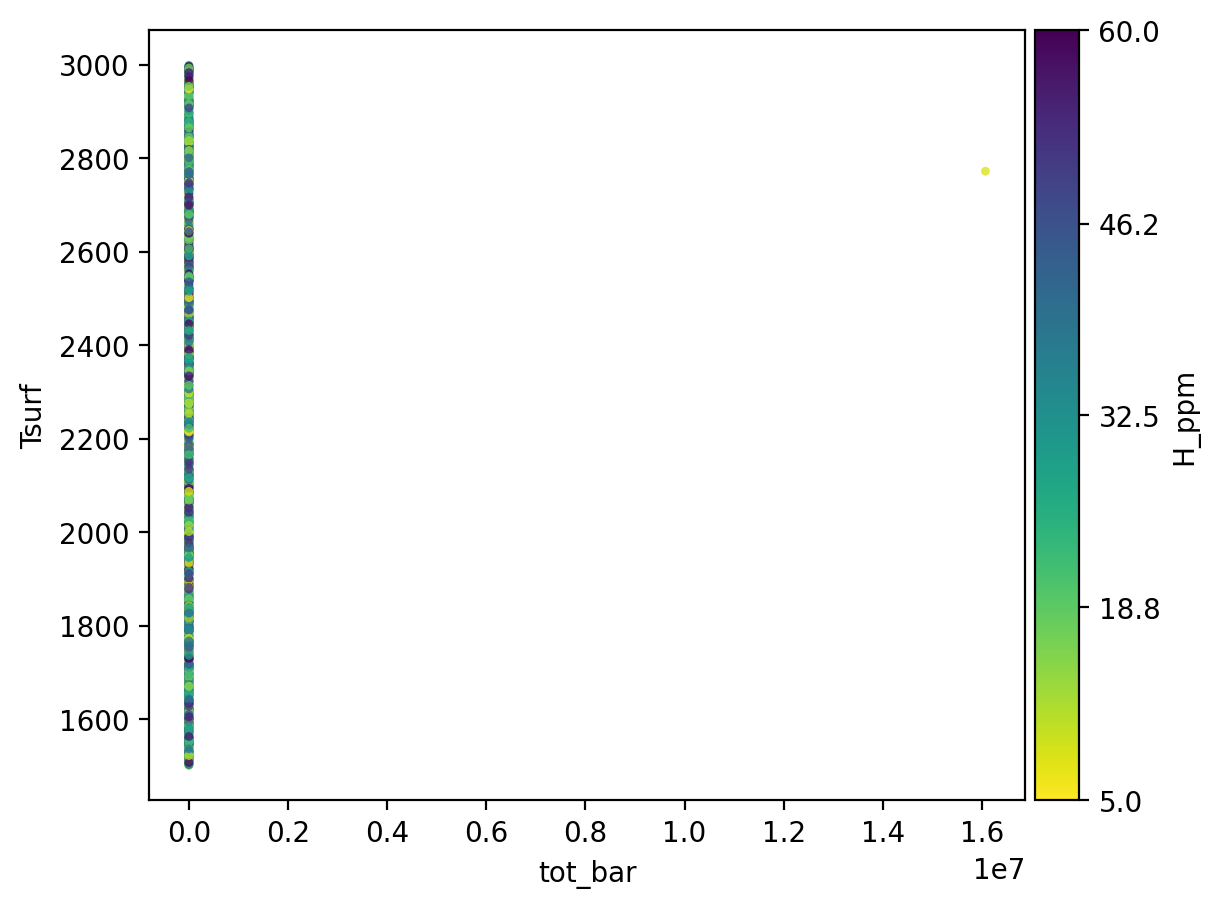

In [3]:
zmin, zmax = None, None
fig,ax = plt.subplots(1,1,figsize=(6,5))

x = "tot_bar"
y = "Tsurf" 
z = "H_ppm"
# zmin, zmax = 0, 100

x_plt = result[x]
y_plt = result[y]
z_plt = result[z]

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
if zmin == None:
    vmin = np.amin(z_plt)
else:
    vmin = zmin
if zmax == None:
    vmax = np.amax(z_plt)
else:
    vmax = zmax
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

im = ax.scatter(x_plt,y_plt,c=z_plt,s=10,alpha=0.8,edgecolors='none', cmap=cmap, norm=norm)

cbar = fig.colorbar(sm, cax=cax, orientation='vertical') 
cbar.ax.set_ylabel(z)

if vmax > 1.0:
    ticks_new = np.linspace(vmin, vmax, 5)
    cbar.ax.set_yticks([round(tv,1) for tv in ticks_new])

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.show()
# fig.savefig("mc.png",dpi=210,bbox_inches='tight')
